In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
skill_dict = {
    1.1: "Skill: Create and plan a clear presentation goal. E.g. Put together a good outline, and make sure the slides create a story that the clients can follow",
    1.2: "Skill: Make the presentation in a concise format without straying from the topic and/or digressing.",
    1.3: "Skill: Be familiar with the topic being presented beyond the DS/ML work. E.g. while working with the soccer game win prediction, be familiar with the soccer rules also.",
    1.4: "Skill: Match your presentation contents to the audience type (technical, non-technical)?",
    1.5: "Skill: Concentrate on the core message in the presentation. Keep the balance of the amount of the details in the presentation; Avoid anything which might lead to confusions.",
    1.6: "Skill: Try to avoid overusing qualifying words. Qualifying words like: \"kinda\", \"just\", \"basically\", \"like\".",
    1.7: "Skill: Pause between ideas allowing the client to chime in.",
    1.8: "Skill: Carefully articulate words and speak at a steady pace. Do not rush through the slides or repeat the same information",
    2.1: "Skill: Keep the formatting consistent throughout the presentation and adhere to the company guidelines.",
    2.2: "Skill: Incorporate concrete examples to illustrate points, show examples from data, plots etc. E.g.: Keep graphics to 1 per slide if possible to avoid clutter; Avoid complicated equations/ideas on main slides, etc.",
    2.3: "Skill: If speaking to a technical audience, adjust your slides accordingly with more technical materials. E.g. use more complex graphics without cluttering the slides; do not oversimplify topics, etc.",
    2.4: "Skill: If speaking to a non-technical audience,  adjust your slides accordingly by staying focused on the main point of the presentation. E.g. avoid the technical details while sharing the overall method/result.",
    2.5: "Skill: Determine the right amount of slides you need to have for the allocated meeting time. Do not have too many or too few slides. Remember to leave extra time for potential questions. E.g. avoid the technical details while sharing the overall method/result.",
    3.1: "Skill: Practice / rehearse the presentation before the meeting",
    3.2: "Skill: Introduce yourself well the first time you present to an audience",
    3.3: "Skill: Remind them to stop you and ask questions at the beginning of the meeting. Wait for a few seconds in between each big picture point.",
    3.4: "Skill: Stay confident and patient when being asked a question. Carefully listen to the client and follow up to make sure the client understood your answer",
    3.5: "Skill: Notice reactions from the audience: e.g. if you feel that the audience is lost, maybe cut the explanation or extend it based on how important it is.",
    3.6: "Skill: Keep in mind the points you are trying to convey and concentrate on helping the client understand them.",
    3.7: "Skill: Relax, breathe and enjoy. Remember that you are the expert in the room and nobody knows the subject as well as you.",
}

In [3]:
# data converted from original survey
data = pd.read_csv('converted.csv')
data.head()

,Q_index,user_index,importance_score,self_rating,teammate_rating,importance_sub_self,teammate_sub_self
0,1.1,0,5.0,3.0,4.0,2.0,1.0
1,1.2,0,5.0,4.0,4.0,1.0,0.0
2,1.3,0,5.0,4.0,5.0,1.0,1.0
3,1.4,0,5.0,3.0,4.0,2.0,1.0
4,1.5,0,5.0,3.0,4.0,2.0,1.0


In [4]:
# calculate the mean values of each column
data_q = data.groupby('Q_index').mean().drop(['user_index'], axis=1)
data_q.head()

,importance_score,self_rating,teammate_rating,importance_sub_self,teammate_sub_self
Q_index,,,,,
1.1,4.785714,3.615385,3.333333,1.230769,-0.250000
1.2,4.142857,3.642857,3.500000,0.500000,-0.166667
1.3,3.857143,3.538462,3.500000,0.461538,0.000000
1.4,4.500000,3.769231,3.250000,0.692308,-0.454545
1.5,4.357143,3.384615,3.384615,0.923077,0.000000


In [5]:
# sort by importance score
data_q_rank_importance = data_q.sort_values(by='importance_score', ascending=False)['importance_score']
data_q_rank_importance

Q_index
1.1    4.785714
3.4    4.571429
1.4    4.500000
1.5    4.357143
3.6    4.285714
2.2    4.285714
2.4    4.214286
1.2    4.142857
2.5    4.071429
3.5    3.928571
3.2    3.857143
1.3    3.857143
1.8    3.857143
3.7    3.785714
1.7    3.785714
3.1    3.642857
2.1    3.642857
2.3    3.642857
1.6    3.500000
3.3    3.428571
Name: importance_score, dtype: float64

In [6]:
print("Skills that are ranked by importance: \n")
for idx in data_q_rank_importance.index:
    print("%2.1f %s" %(idx, skill_dict[idx]))

Skills that are ranked by importance: 

1.1 Skill: Create and plan a clear presentation goal. E.g. Put together a good outline, and make sure the slides create a story that the clients can follow
3.4 Skill: Stay confident and patient when being asked a question. Carefully listen to the client and follow up to make sure the client understood your answer
1.4 Skill: Match your presentation contents to the audience type (technical, non-technical)?
1.5 Skill: Concentrate on the core message in the presentation. Keep the balance of the amount of the details in the presentation; Avoid anything which might lead to confusions.
3.6 Skill: Keep in mind the points you are trying to convey and concentrate on helping the client understand them.
2.2 Skill: Incorporate concrete examples to illustrate points, show examples from data, plots etc. E.g.: Keep graphics to 1 per slide if possible to avoid clutter; Avoid complicated equations/ideas on main slides, etc.
2.4 Skill: If speaking to a non-technica

In [7]:
# sort by importance score - self rating
# higher value indicates that we need to improve in those skills
data_q_rank_impsubself = data_q.sort_values(by='importance_sub_self', ascending=False)['importance_sub_self']
data_q_rank_impsubself

Q_index
1.1    1.230769
3.2    1.000000
1.5    0.923077
3.1    0.923077
3.4    0.769231
3.6    0.692308
1.4    0.692308
1.6    0.692308
2.5    0.615385
2.4    0.615385
3.5    0.538462
1.2    0.500000
3.7    0.461538
1.8    0.461538
1.3    0.461538
3.3    0.384615
1.7    0.384615
2.2    0.307692
2.1    0.076923
2.3   -0.076923
Name: importance_sub_self, dtype: float64

In [8]:
print("Skills that are ranked by the importance score minus self rating: \n")
for idx in data_q_rank_impsubself.index:
    print("%2.1f %s" %(idx, skill_dict[idx]))

Skills that are ranked by the importance score minus self rating: 

1.1 Skill: Create and plan a clear presentation goal. E.g. Put together a good outline, and make sure the slides create a story that the clients can follow
3.2 Skill: Introduce yourself well the first time you present to an audience
1.5 Skill: Concentrate on the core message in the presentation. Keep the balance of the amount of the details in the presentation; Avoid anything which might lead to confusions.
3.1 Skill: Practice / rehearse the presentation before the meeting
3.4 Skill: Stay confident and patient when being asked a question. Carefully listen to the client and follow up to make sure the client understood your answer
3.6 Skill: Keep in mind the points you are trying to convey and concentrate on helping the client understand them.
1.4 Skill: Match your presentation contents to the audience type (technical, non-technical)?
1.6 Skill: Try to avoid overusing qualifying words. Qualifying words like: "kinda", "ju

In [9]:
# sort by teammate rating - self rating
# higher value indicates that one can possibly learn from a teammate
data_q_rank_tmmsubself = data_q.sort_values(by='teammate_sub_self', ascending=False)['teammate_sub_self']
data_q_rank_tmmsubself

Q_index
3.1    0.583333
3.2    0.416667
3.7    0.333333
1.6    0.333333
3.3    0.166667
2.5    0.000000
1.3    0.000000
1.5    0.000000
1.7    0.000000
3.6   -0.083333
2.3   -0.083333
1.8   -0.083333
2.4   -0.166667
1.2   -0.166667
3.4   -0.166667
3.5   -0.166667
2.1   -0.250000
1.1   -0.250000
2.2   -0.416667
1.4   -0.454545
Name: teammate_sub_self, dtype: float64

In [10]:
print("Skills that are ranked by the teammate rating minus self rating: \n")
for idx in data_q_rank_tmmsubself.index:
    print("%2.1f %s" %(idx, skill_dict[idx]))

Skills that are ranked by the teammate rating minus self rating: 

3.1 Skill: Practice / rehearse the presentation before the meeting
3.2 Skill: Introduce yourself well the first time you present to an audience
3.7 Skill: Relax, breathe and enjoy. Remember that you are the expert in the room and nobody knows the subject as well as you.
1.6 Skill: Try to avoid overusing qualifying words. Qualifying words like: "kinda", "just", "basically", "like".
3.3 Skill: Remind them to stop you and ask questions at the beginning of the meeting. Wait for a few seconds in between each big picture point.
2.5 Skill: Determine the right amount of slides you need to have for the allocated meeting time. Do not have too many or too few slides. Remember to leave extra time for potential questions. E.g. avoid the technical details while sharing the overall method/result.
1.3 Skill: Be familiar with the topic being presented beyond the DS/ML work. E.g. while working with the soccer game win prediction, be fami

In [11]:
# skill index which are in the top 10 importance score and
#      it is in the top 10 (importance score - self rating) 
# these skills are considered important and need improvements.

qidx_imp_selflow = [i for i in data_q_rank_importance.index[0:10] if i in data_q_rank_impsubself.index[0:10]]
for idx in qidx_imp_selflow:
    print("%2.1f %s" %(idx, skill_dict[idx]))

1.1 Skill: Create and plan a clear presentation goal. E.g. Put together a good outline, and make sure the slides create a story that the clients can follow
3.4 Skill: Stay confident and patient when being asked a question. Carefully listen to the client and follow up to make sure the client understood your answer
1.4 Skill: Match your presentation contents to the audience type (technical, non-technical)?
1.5 Skill: Concentrate on the core message in the presentation. Keep the balance of the amount of the details in the presentation; Avoid anything which might lead to confusions.
3.6 Skill: Keep in mind the points you are trying to convey and concentrate on helping the client understand them.
2.4 Skill: If speaking to a non-technical audience,  adjust your slides accordingly by staying focused on the main point of the presentation. E.g. avoid the technical details while sharing the overall method/result.
2.5 Skill: Determine the right amount of slides you need to have for the allocated 

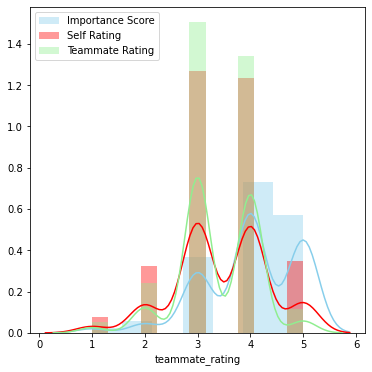

In [12]:
plt.figure(figsize=(6, 6))
sns.distplot(data['importance_score'], color="skyblue", label="Importance Score")
sns.distplot(data['self_rating'], color="red", label="Self Rating")
sns.distplot(data['teammate_rating'], color="lightgreen", label="Teammate Rating")
plt.legend()
plt.show()

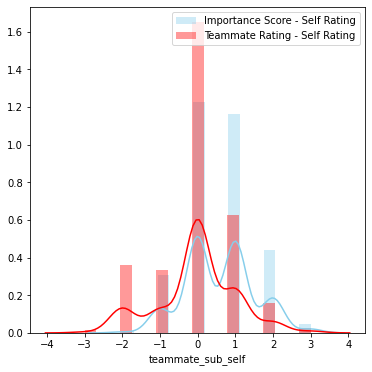

In [13]:
plt.figure(figsize=(6, 6))
sns.distplot(data['importance_sub_self'], color="skyblue", label="Importance Score - Self Rating")
sns.distplot(data['teammate_sub_self'], color="red", label="Teammate Rating - Self Rating")
plt.legend()
plt.show()